### AND logic gate implementing in  perceptron.


#### import the package and import the data

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

x_data = [[0.0, 0.0, 1.0, 1.0],[0.0 ,1.0 ,0.0, 1.0]]
y_data = [[1.0, 0.0, 0.0, 0.0]]

tf.reset_default_graph()

#### create the placeholder for inputs and label , Build the model 

In [130]:
X = tf.placeholder('float', None, name = 'Input')
Y_desired = tf.placeholder('float', None, name = 'desired_output')

W = tf.Variable(tf.random_uniform([1,2], maxval=1),'float', name = 'weight' )
b = tf.Variable(tf.random_uniform([1,1], maxval=1) , 'float', name = 'bias')

#model of perceptron
Y_predict = tf.sigmoid(tf.matmul(W, X) + b, name = 'Y_predict')

#### specify the cost function and derivative of W and b

In [131]:
learning_rate = tf.constant(1.0,name = 'learning_rate')
iteration_cost = [];

cost =tf.reduce_sum(Y_desired * tf.log(Y_predict) + (1 - Y_desired) * tf.log(1 - Y_predict)) * (-1)

error = tf.subtract(Y_desired, Y_predict, name = 'error')
individual_dw = tf.multiply(error, x_data)

del_w = tf.reduce_sum(individual_dw * learning_rate, 1,keep_dims=True, name = 'gradientw')
del_b = tf.reduce_sum(error * learning_rate,keep_dims=True, name = 'gradientb')

assign_W_op = W.assign_add(tf.transpose(del_w))
assign_b_op = b.assign_add(del_b)


#### Train our model

In [132]:
with tf.Session() as sess:
    sess.run(W.initializer)
    sess.run(b.initializer)
    writer = tf.summary.FileWriter("./graphs", sess.graph)
    for i in range(600):
        sess.run(assign_W_op, {X:x_data, Y_desired:y_data })
        sess.run(assign_b_op, {X:x_data, Y_desired:y_data})
        iteration_cost.append(sess.run(cost, {X:x_data, Y_desired:y_data}))
    w_test = W.eval()
    b_test = b.eval()
    print(sess.run(Y_predict, {X:x_data, Y_desired:y_data}))

[[  9.91645038e-01   3.34996660e-03   3.34992819e-03   9.51867420e-08]]


In [119]:
!bash
tensorboard --logdir="./graphs" --port 6006

SyntaxError: invalid syntax (<ipython-input-119-d5eba2107cac>, line 2)

#### plot the cost value over the iteration

[[-10.47197533 -10.47196388]] [[ 4.77651453]]


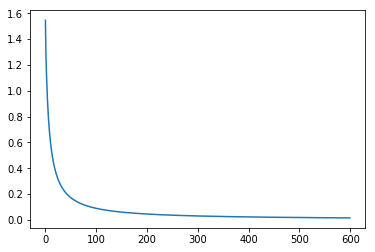

In [133]:

plt.plot(iteration_cost)
print(w_test,b_test)
plt.show()

#### Test our model and print accuracy 

In [134]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [135]:
test_count = 5
x_da = np.transpose(x_data)
y_da = np.transpose(y_data)
w_da = np.transpose(w_test)
b_da = b_test

total_data = 0
correct_data = 0
for i in range(test_count):
    count = 0;
    for x in x_da:
        x = x + np.random.uniform(-0.5,0.5 ,[1,2])
        y = np.matmul(x,w_da) + b_da
        y = sigmoid(y)
        if (abs(y_da[count]- y) < 0.5):
            correct_data = correct_data + 1
        print(y_da[count], y)
        count = count +1
        total_data = total_data + 1

print(correct_data / total_data)    

[ 1.] [[ 0.17228203]]
[ 0.] [[  8.52562129e-05]]
[ 0.] [[ 0.00011777]]
[ 0.] [[  2.55894247e-05]]
[ 1.] [[ 0.03896671]]
[ 0.] [[ 0.17927545]]
[ 0.] [[ 0.00079509]]
[ 0.] [[  2.81363128e-07]]
[ 1.] [[ 0.98726113]]
[ 0.] [[ 0.00515584]]
[ 0.] [[ 0.00676706]]
[ 0.] [[  3.13953252e-07]]
[ 1.] [[ 0.99993382]]
[ 0.] [[ 0.40233702]]
[ 0.] [[ 0.02420673]]
[ 0.] [[  1.19399534e-06]]
[ 1.] [[ 0.98811558]]
[ 0.] [[ 0.00480032]]
[ 0.] [[ 0.00087354]]
[ 0.] [[  7.20948105e-08]]
0.9


#### Decision boundary

In [136]:
x2 = []
for x1 in np.linspace(0,1.5,20):
    temp = -b_da - w_da[1] * x1
    temp = temp / w_da[0]
    x2.append(temp)
   
        

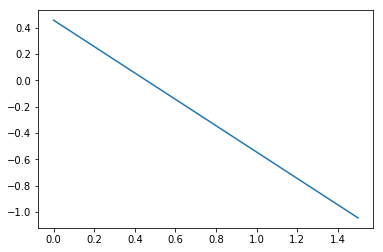

In [137]:
x1  = np.linspace(0,1.5,20)
x2 = [float(d) for d in x2]
plt.plot(x1, x2)
plt.show()
